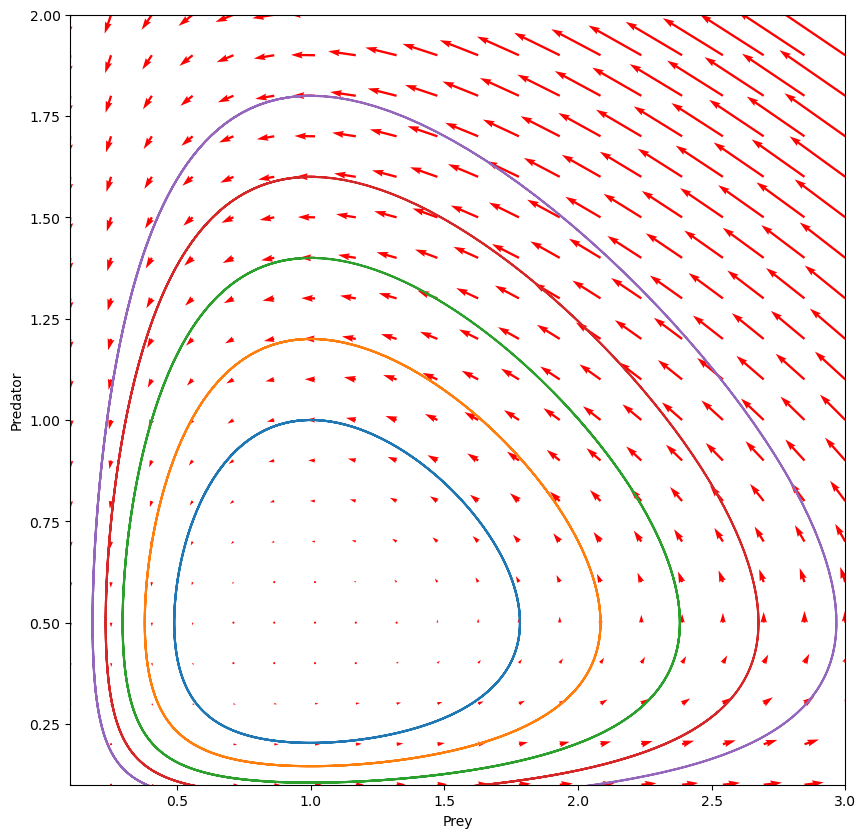

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
a = 2 / 3
b = 4 / 3
c = 1
d = 1

x_start = 0.1
x_end = 3

y_start = 0.1
y_end = 2


# Equations
def derivatives(state, t):
    x, y = state
    dxdt = a * x - b * x * y
    dydt = c * x * y - d * y
    return [dxdt, dydt]


# Grid for flow field
x = np.linspace(x_start, x_end, 20)
y = np.linspace(y_start, y_end, 20)
X, Y = np.meshgrid(x, y)
U = a * X - b * X * Y
V = c * X * Y - d * Y

# Plotting flow field
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, U, V, color="r")
plt.xlabel("Prey")
plt.ylabel("Predator")

# Initial conditions for trajectories
initial_conditions = [[1, 1 + 0.2 * i] for i in range(5)]
t = np.linspace(0, 25, 1000)

for ic in initial_conditions:
    trajectory = odeint(derivatives, ic, t)
    plt.plot(trajectory[:, 0], trajectory[:, 1])

plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.savefig("plot1.png")
plt.show()

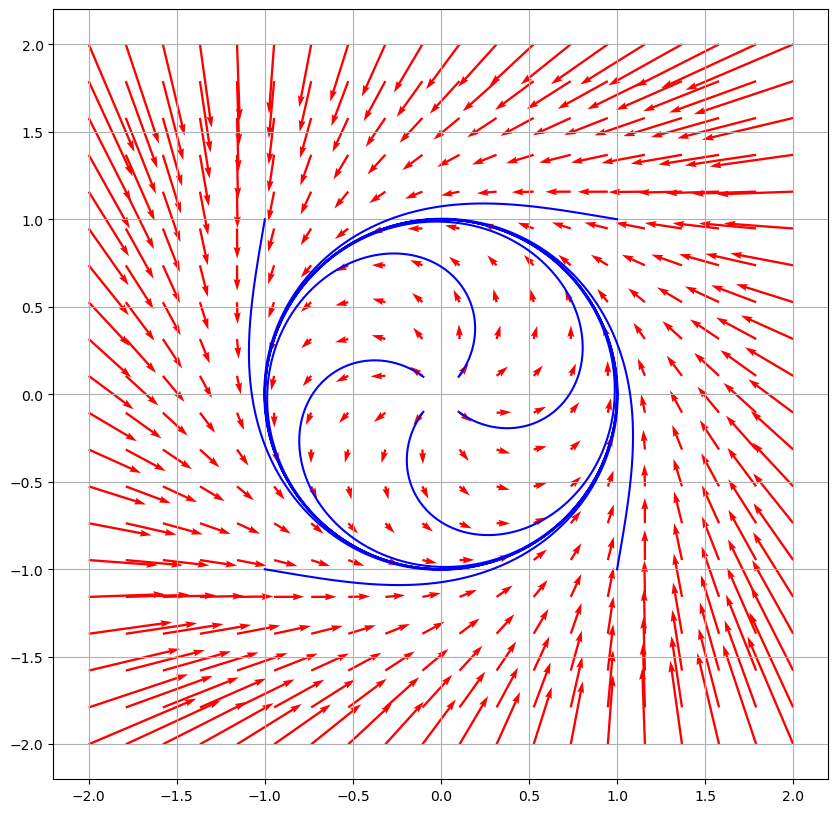

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Define the system of differential equations
def system(xy, t):
    x, y = xy
    dxdt = -y + x * (1 - x**2 - y**2) / np.sqrt(x**2 + y**2)
    dydt = x + y * (1 - x**2 - y**2) / np.sqrt(x**2 + y**2)
    return [dxdt, dydt]


# Set up a grid for the phase space
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Calculate the direction of the vector field at each grid point
DX, DY = system([X, Y], 0)

# Integrate the system of differential equations to plot trajectories
t = np.linspace(0, 10, 1000)
initial_conditions = [
    [1, 1],
    [-1, -1],
    [-1, 1],
    [1, -1],
    [0.1, 0.1],
    [-0.1, -0.1],
    [-0.1, 0.1],
    [0.1, -0.1],
]  # Initial conditions for trajectories

# Plot the vector field and trajectories
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, DX, DY, color="red", scale=50)
for ic in initial_conditions:
    sol = odeint(system, ic, t)
    plt.plot(sol[:, 0], sol[:, 1], color="blue")
plt.grid(True)
plt.savefig("plot2.png")
plt.show()